# Web Scraping with Beautifu soup
Building a Yelp Webscraper to Pull Dataset of All chicago and oak park restaurants (number of reviews, ratings,types of cuisine, comments)

In [ ]:
pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


# Web scraping Chicago Restaurants

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

final_data = []

# Function to scrape restaurant information from the search results page
def parse_url(url):
    response = requests.get(url, headers=headers)
    print(f"URL: {url}, Status Code: {response.status_code}")
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for biz in soup.find_all('div', class_='y-css-cxcdjj'):
            info_scraped = {}
            try:
                info_scraped['restaurant_name'] = biz.find('a', class_='y-css-12ly5yx').text.strip()
            except Exception as e:
                info_scraped['restaurant_name'] = None

            try:
                info_scraped['restaurant_url'] = "https://www.yelp.com" + biz.find('a', class_='y-css-12ly5yx')['href']
            except Exception as e:
                info_scraped['restaurant_url'] = None

            try:
                info_scraped['ratings'] = biz.find('div', class_='y-css-9tnml4')['aria-label']
            except Exception as e:
                info_scraped['ratings'] = None

            try:
                review_text = biz.find('span', class_='y-css-wfbtsu').text
                info_scraped['review_number'] = int(review_text.replace(' reviews', '').replace('(', '').replace(')', '').replace('k', '000').replace('.', ''))
            except Exception as e:
                info_scraped['review_number'] = None

            try:
                info_scraped['price'] = biz.find('span', class_='priceRange__09f24__ZgJXy').text.strip()
            except Exception as e:
                info_scraped['price'] = None

            try:
                tags = biz.find_all('span', class_='y-css-1cn4gbs')
                info_scraped['restaurant_tag'] = ', '.join([tag.text for tag in tags])
            except Exception as e:
                info_scraped['restaurant_tag'] = None

            try:
                # Get the address by finding the span after the price
                price_span = biz.find('span', class_='priceRange__09f24__ZgJXy')
                address_span = price_span.find_next_sibling('span', class_='y-css-wfbtsu')
                info_scraped['restaurant_address'] = address_span.text.strip() if address_span else None
            except Exception as e:
                info_scraped['restaurant_address'] = None

            try:
                info_scraped['top_comment'] = biz.find('p', class_='y-css-15ug36k').text.strip()
            except Exception as e:
                info_scraped['top_comment'] = None

            final_data.append(info_scraped)
    else:
        print(f"Failed to retrieve data from {url}")

# Main function to scrape multiple pages
def scrape_yelp_pages(location, num_pages):
    for page_no in range(num_pages):
        yelp_url = f"https://www.yelp.com/search?cflt=restaurants&find_loc={location.replace(' ', '%20')}&start={int(page_no) * 10}"
        parse_url(yelp_url)
    df = pd.DataFrame(final_data)
    df.to_csv("url_yelp.csv", index=False)
    return df

# Assigning number of pages (aiming for at least 300 URLs)
scraped_links_df = scrape_yelp_pages("Chicago, IL", num_pages=40)

scraped_links_df = scraped_links_df[~scraped_links_df['restaurant_url'].str.contains('adredir')]


In [4]:
scraped_links_df.head()

,restaurant_name,restaurant_url,ratings,review_number,price,restaurant_tag,restaurant_address,top_comment
2,Girl & The Goat,https://www.yelp.com/biz/girl-and-the-goat-chi...,4.4 star rating,101000.0,$$$,"New American, Bakeries, Coffee & Tea",West Loop,“Phenomenal food and amazing service. Usually ...
3,Lone Owl Pub,https://www.yelp.com/biz/lone-owl-pub-chicago,4.6 star rating,31.0,None,"Cocktail Bars, Lounges, Burgers",None,“I don't know how we've missed thus place! Coo...
4,The Purple Pig,https://www.yelp.com/biz/the-purple-pig-chicago,4.3 star rating,85000.0,$$$,"Tapas/Small Plates, Mediterranean, New American",Near North Side,“this place is amazing. some of the best food ...
5,Penumbra,https://www.yelp.com/biz/penumbra-chicago,4.8 star rating,924.0,$$$,"Wine Bars, Seafood, Steakhouses",Logan Square,“Service was great very attentive. Food and dr...
6,No Vacancy,https://www.yelp.com/biz/no-vacancy-chicago,4.6 star rating,101.0,$$,"New American, Wine Bars, Beer, Wine & Spirits",River North,“We had a fun bachelorette party at No Vacancy...


# Web scraping Oak Park Restaurants

In [5]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

final_data_op = []

# Function to scrape restaurant information from the search results page
def parse_url(url):
    response = requests.get(url, headers=headers)
    print(f"URL: {url}, Status Code: {response.status_code}")
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for biz in soup.find_all('div', class_='y-css-cxcdjj'):
            info_scraped = {}
            try:
                info_scraped['restaurant_name'] = biz.find('a', class_='y-css-12ly5yx').text.strip()
            except Exception as e:
                info_scraped['restaurant_name'] = None

            try:
                info_scraped['restaurant_url'] = "https://www.yelp.com" + biz.find('a', class_='y-css-12ly5yx')['href']
            except Exception as e:
                info_scraped['restaurant_url'] = None

            try:
                info_scraped['ratings'] = biz.find('div', class_='y-css-9tnml4')['aria-label']
            except Exception as e:
                info_scraped['ratings'] = None

            try:
                review_text = biz.find('span', class_='y-css-wfbtsu').text
                info_scraped['review_number'] = int(review_text.replace(' reviews', '').replace('(', '').replace(')', '').replace('k', '000').replace('.', ''))
            except Exception as e:
                info_scraped['review_number'] = None

            try:
                info_scraped['price'] = biz.find('span', class_='priceRange__09f24__ZgJXy').text.strip()
            except Exception as e:
                info_scraped['price'] = None

            try:
                tags = biz.find_all('span', class_='y-css-1cn4gbs')
                info_scraped['restaurant_tag'] = ', '.join([tag.text for tag in tags])
            except Exception as e:
                info_scraped['restaurant_tag'] = None

            try:
                # Get the address by finding the span after the price
                price_span = biz.find('span', class_='priceRange__09f24__ZgJXy')
                address_span = price_span.find_next_sibling('span', class_='y-css-wfbtsu')
                info_scraped['restaurant_address'] = address_span.text.strip() if address_span else None
            except Exception as e:
                info_scraped['restaurant_address'] = None

            try:
                info_scraped['top_comment'] = biz.find('p', class_='y-css-15ug36k').text.strip()
            except Exception as e:
                info_scraped['top_comment'] = None

            final_data_op.append(info_scraped)
    else:
        print(f"Failed to retrieve data from {url}")

# Main function to scrape multiple pages
def scrape_yelp_pages(location, num_pages):
    for page_no in range(num_pages):
        yelp_url = f"https://www.yelp.com/search?cflt=restaurants&find_loc={location.replace(' ', '%20')}&start={int(page_no) * 10}"
        parse_url(yelp_url)
    df = pd.DataFrame(final_data_op)
    return df

# Assigning number of pages (aiming for at least 300 URLs)
scraped_links_oak_park_df = scrape_yelp_pages("Oak Park, IL", num_pages=40)

# Filter out ad URLs
scraped_links_oak_park_df = scraped_links_oak_park_df[~scraped_links_oak_park_df['restaurant_url'].str.contains('adredir')]



URL: https://www.yelp.com/search?cflt=restaurants&find_loc=Oak%20Park,%20IL&start=0, Status Code: 200


In [6]:
scraped_links_oak_park_df['restaurant_address'] = scraped_links_oak_park_df['restaurant_address'].fillna('Oak Park')


In [7]:
scraped_links_oak_park_df.head()

,restaurant_name,restaurant_url,ratings,review_number,price,restaurant_tag,restaurant_address,top_comment
2,Amerikas,https://www.yelp.com/biz/amerikas-oak-park,4.6 star rating,328.0,None,"Latin American, New American",Oak Park,“The first thing that I noticed about Amerikas...
3,Rustico,https://www.yelp.com/biz/rustico-oak-park,4.4 star rating,323.0,None,"Italian, Mediterranean, Spanish",Oak Park,“I don't really like to do a first time review...
4,The Little Gem Cafe,https://www.yelp.com/biz/the-little-gem-cafe-o...,3.9 star rating,326.0,None,"New American, Bars, Brasseries",Oak Park,“This is one of the family favorites. It's su...
5,Maya Del Sol,https://www.yelp.com/biz/maya-del-sol-oak-park,4.1 star rating,12000.0,None,"Latin American, Cocktail Bars",Oak Park,“I drive by this restaurant at least once a we...
6,Citrine Cafe,https://www.yelp.com/biz/citrine-cafe-oak-park,4.1 star rating,235.0,None,"Mediterranean, Beer, Wine & Spirits, Cocktail ...",Oak Park,“Brunch was excellent today. Chicken and beign...


In [8]:
chi = scraped_links_df.copy()
op = scraped_links_oak_park_df.copy()

# Exploratory Data Analysis

In [9]:


# Basic data cleaning
def clean_data(df):
    # Remove rows with ad URLs
    df = df[~df['restaurant_url'].str.contains('adredir')]

    # Fill missing restaurant addresses with 'Unknown'
    df['restaurant_address'] = df['restaurant_address'].fillna('Unknown')

    # Fill missing ratings with a placeholder (e.g., 'No Rating')
    df['ratings'] = df['ratings'].fillna('No Rating')

    # Fill missing price with a placeholder (e.g., 'Unknown')
    df['price'] = df['price'].fillna('Unknown')

    # Fill missing review numbers with 0
    df['review_number'] = df['review_number'].fillna(0)

    # Fill missing tags with a placeholder (e.g., 'No Tags')
    df['restaurant_tag'] = df['restaurant_tag'].fillna('No Tags')

    # Fill missing top comments with a placeholder (e.g., 'No Comment')
    df['top_comment'] = df['top_comment'].fillna('No Comment')

    return df

# Clean the data
chi_cleaned = clean_data(chi)
op_cleaned = clean_data(op)



In [10]:
op_cleaned

,restaurant_name,restaurant_url,ratings,review_number,price,restaurant_tag,restaurant_address,top_comment
2,Amerikas,https://www.yelp.com/biz/amerikas-oak-park,4.6 star rating,328.0,Unknown,"Latin American, New American",Oak Park,“The first thing that I noticed about Amerikas...
3,Rustico,https://www.yelp.com/biz/rustico-oak-park,4.4 star rating,323.0,Unknown,"Italian, Mediterranean, Spanish",Oak Park,“I don't really like to do a first time review...
4,The Little Gem Cafe,https://www.yelp.com/biz/the-little-gem-cafe-o...,3.9 star rating,326.0,Unknown,"New American, Bars, Brasseries",Oak Park,“This is one of the family favorites. It's su...
5,Maya Del Sol,https://www.yelp.com/biz/maya-del-sol-oak-park,4.1 star rating,12000.0,Unknown,"Latin American, Cocktail Bars",Oak Park,“I drive by this restaurant at least once a we...
6,Citrine Cafe,https://www.yelp.com/biz/citrine-cafe-oak-park,4.1 star rating,235.0,Unknown,"Mediterranean, Beer, Wine & Spirits, Cocktail ...",Oak Park,“Brunch was excellent today. Chicken and beign...
7,Habrae,https://www.yelp.com/biz/habrae-forest-park-2,4.8 star rating,105.0,Unknown,"Thai, Desserts, Cafes",Oak Park,“Stopped at this lovely family ran restaurant ...
8,Hoja Santa,https://www.yelp.com/biz/hoja-santa-oak-park,4.1 star rating,13.0,Unknown,"Bars, Pizza, Mexican",Oak Park,“Food was 5 stars and the service was put stan...
9,Piacere Mio,https://www.yelp.com/biz/piacere-mio-forest-park,4.8 star rating,35.0,Unknown,Italian,Oak Park,“Food was 10 out of 10! So glad that we found ...
10,Café Cubano,https://www.yelp.com/biz/caf%C3%A9-cubano-oak-...,4 star rating,8.0,Unknown,"Cuban, Sandwiches",Oak Park,“Great place for Cuban food. The atmosphere ...
11,Hemmingway’s Bistro,https://www.yelp.com/biz/hemmingways-bistro-oa...,4 star rating,338.0,Unknown,"Breakfast & Brunch, Steakhouses, Seafood",Oak Park,“Oh my gosh! Where to start? \nThe lobster sp...


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Check column names
print(chi_cleaned.columns)

# Ensure ratings column is string type
chi_cleaned['ratings'] = chi_cleaned['ratings'].astype(str)

# Convert ratings to float
chi_cleaned['ratings'] = chi_cleaned['ratings'].str.extract('(\d+\.\d+)').astype(float)

# Split restaurant_tag into multiple tags
if 'restaurant_tag' in chi_cleaned.columns:
    tags = chi_cleaned['restaurant_tag'].str.get_dummies(sep=', ')
    # Concatenate the new one-hot encoded tags with the original dataframe
    chi_cleaned = pd.concat([chi_cleaned, tags], axis=1)
    # Drop the original restaurant_tag column if no longer needed
    chi_cleaned.drop(columns=['restaurant_tag'], inplace=True)
else:
    print("Column 'restaurant_tag' not found in DataFrame.")

# Label Encoding for restaurant_address column
if 'restaurant_address' in chi_cleaned.columns:
    le = LabelEncoder()
    chi_cleaned['restaurant_address_encoded'] = le.fit_transform(chi_cleaned['restaurant_address'])
else:
    print("Column 'restaurant_address' not found in DataFrame.")

# Now chi_cleaned is encoded and ready for further analysis


Index(['restaurant_name', 'restaurant_url', 'ratings', 'review_number',
       'price', 'restaurant_tag', 'restaurant_address', 'top_comment'],
      dtype='object')


In [12]:
# Map the price column to numeric values
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4,'Unknown': 0}
chi_cleaned['price_encoded'] = chi_cleaned['price'].map(price_mapping)

# Now chi_cleaned is encoded and ready for further analysis


In [13]:
chi_cleaned.drop(columns=['restaurant_url'], inplace=True)


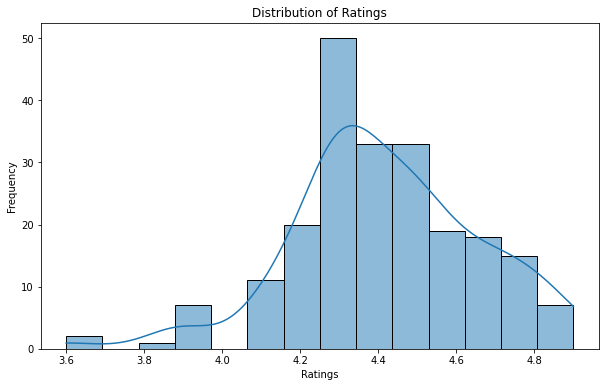

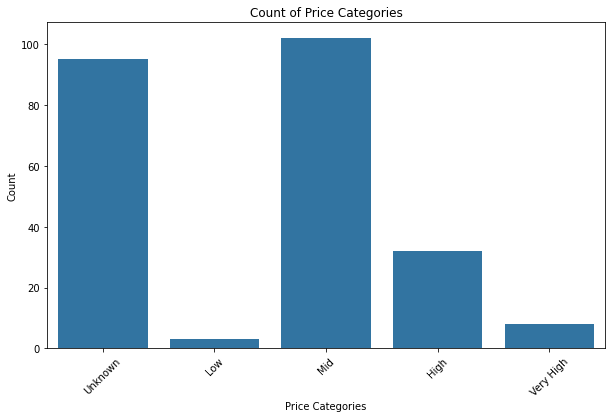

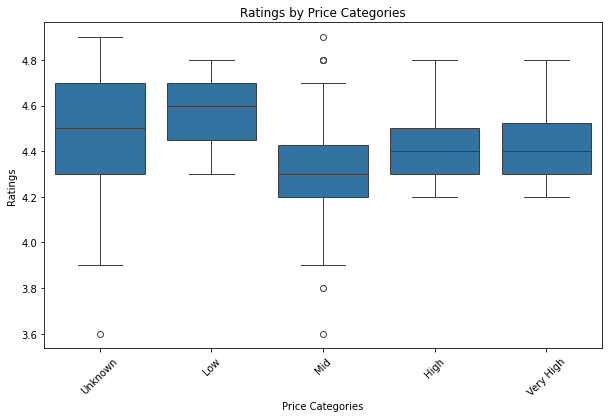

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out non-numeric columns for the correlation matrix
numeric_df = chi_cleaned.select_dtypes(include=[float, int])

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(chi_cleaned['ratings'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()
# Disable LaTeX for the entire plot
plt.rcParams['text.usetex'] = False
# Count plot of price categories
plt.figure(figsize=(10, 6))
sns.countplot(x='price_encoded', data=chi_cleaned)
plt.title('Count of Price Categories')
plt.xlabel('Price Categories')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Unknown', 'Low', 'Mid', 'High', 'Very High'], rotation=45)
plt.show()

# Box plot of ratings by price categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_encoded', y='ratings', data=chi_cleaned)
plt.title('Ratings by Price Categories')
plt.xlabel('Price Categories')
plt.ylabel('Ratings')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Unknown', 'Low', 'Mid', 'High', 'Very High'], rotation=45)
plt.show()